gets name, focuscode and frequency range of all observatories of a specific day

In [ ]:
import stations
import const
import datetime

In [ ]:
from astropy.io import fits
import urllib
from bs4 import BeautifulSoup
import datetime

frq_limit_low = 50
frq_limit_high = 500

def listFilesDay(url):
    page = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(page, 'html.parser')
    return [node.get('href') for node in soup.find_all('a') if node.get('href').endswith('.fit.gz')]

# mydate = "/2022/01/26"
mydate = "{:%Y/%m/%d}".format(datetime.date.today())
url = 'http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/'
files = listFilesDay(url+mydate)

stations = []
for i in files:
    parts = i.rsplit("_")
    stations.append([parts[0], parts[3][:2]])
stations_clean = []
for i in stations:
    if i not in stations_clean:
        stations_clean.append(i)

def listFD(url, station):
    print(station)
    page = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(page, 'html.parser')

    return [url + '/' + node.get('href') for node in soup.find_all('a') if node.get('href').startswith(station[0]) and node.get('href').endswith(station[1] + '.fit.gz')]

for i in stations_clean:
    for a, b in enumerate(listFD(url + mydate, i)):

        with fits.open(b) as fds:
            """
            try except -> print(fds[0].header["CDELT2"])
                          print(fds[0].header["CRVAL2"] - fds[0].header["CDELT2"] * fds[0].header["CRPIX2"])
            if fds[1] exists
            """
            lat = fds[0].header['OBS_LAT']
            lac = fds[0].header['OBS_LAC']
            if lac =='S':
                lat = -lat
            lon = fds[0].header['OBS_LON']
            loc = fds[0].header['OBS_LOC']
            if loc=='W':
                lon = -lon
            frq_axis = fds[1].data['frequency'].flatten()
            frq = sorted([frq_axis[0], frq_axis[-1]])
            if frq[0]<frq_limit_low and frq[1]<frq_limit_high:
                print(i[0],i[1], lon, lat, frq)
            else:
                print("discard: ---------------- ", i[0],i[1], lon, lat, frq)
            break


TODO: what frequency ranges are allowed to correlate 

TODO: rewrite observatories -> focus code part of class

TODO: write/load observatories to/from file

In [ ]:
import datetime 
import stations
import download
today = datetime.datetime.today()
stats = stations.getStations(today)
download.downloadFullDay(today, stats)

In [ ]:
import data
import datetime 
%load_ext autoreload
%autoreload 2

In [ ]:
date = datetime.datetime(2022,9,6)

dp = data.createDay(date, station="ALASKA-COHOE")
dp.plot()


In [ ]:
import correlation
import datetime 
import data 
import analysis 

a = analysis.loadData(2022,1,3)

# aaa = data.createFromTime(2022,1,3,0,0,5, station=a[0].stations[0])
# bbb = data.createFromTime(2022,1,3,0,0,5, station=a[0].stations[1])
# 
# cor = correlation.Correlation(bbb,aaa,3)
# cor.calculatePeaks()
date = datetime.datetime(2022,1,3,0,0,5)
dp1, dp2, cor = analysis.calcPoint(2022,1,3,"00:00:15", a[0].stations[0], a[0].stations[1])

analysis.plotEverything(dp1,dp2,cor)

In [1]:
import analysis
import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import correlation
%load_ext autoreload
%autoreload 2

2022_1_3_KASI_MONGOLIA-UB_45_nobg_bintime_4_flatten_2000.png
[]
done


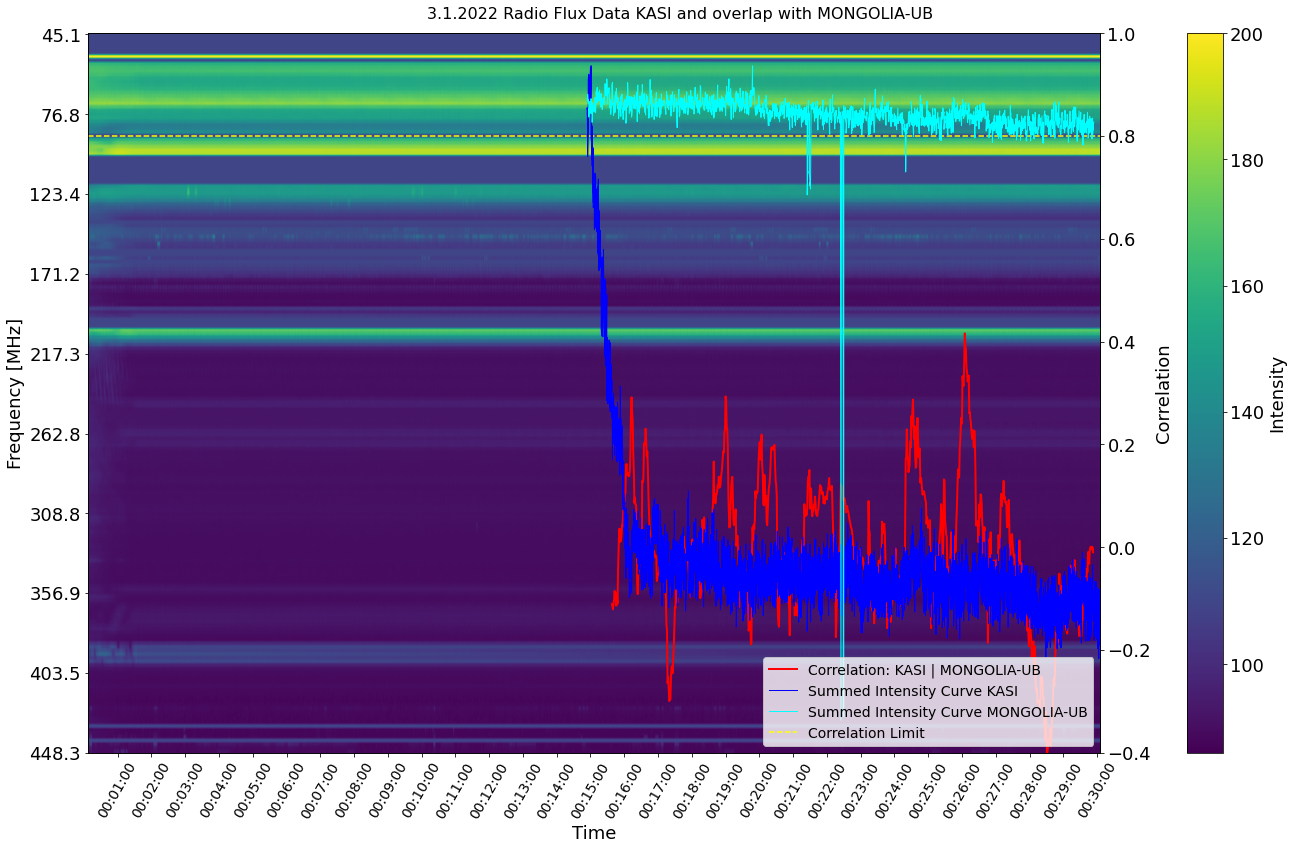

In [8]:
dp1, dp2, cor = analysis.calcPoint(2022,1,3,0,16,1, obs1="KASI",obs2="MONGOLIA-UB", mask_frq=True)
print("done")
analysis.plotEverything(dp1,dp2,cor)

In [4]:
from astropy.io import fits

with fits.open("./eCallistoData/2022/01/01/ALASKA-COHOE_20220101_234516_00.fit.gz") as tmp:
    print(tmp[0].header["TIME-END"])

00:00:16


In [6]:
import data
import stations
import correlation
import events
import analysis
import reference

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [12]:
for k in range(1,10):
    day = 2022,1,k
    print("_____________________________\n", *day,)
    a = analysis.loadData(*day, step=2)

    for i in a:
        print(i)
        for j in i.stations:
            print("\t", j, j.focus_code, j.spectral_range)
    print("")
    print("eCallisto - Website")
    b = reference.listMonstein(*day)
    for i in b:
        print(i, i.stations)

    print("NOAA SWPC")
    c = reference.listSWPC(*day)
    for i in c:
        print(i)

_____________________________
 2022 1 1
['III', 13:15:30, 13:15:31, '0.9191']
	 AUSTRIA-OE3FLB 57 [20.0, 91.625]
	 MRO 60 [49.988, 846.2379999999999]
	 MRO 60 [49.988, 846.2379999999999]
[' II', 13:42:35, 13:45:26, '0.9986']
	 AUSTRIA-UNIGRAZ 01 [45.0, 80.875]
	 GLASGOW 59 [45.0, 80.81300354003906]
	 AUSTRIA-UNIGRAZ 01 [45.0, 80.875]
['III', 14:12:42, 14:13:13, '0.8212']
	 SWISS-HB9SCT 02 [10.0, 81.93800354003906]
	 URUGUAY 01 [45.0, 868.68798828125]
	 SWISS-HB9SCT 02 [10.0, 81.93800354003906]
['III', 15:15:46, 15:16:07, '0.8270']
	 ALGERIA-CRAAG 59 [45.0, 164.93800354003906]
	 SWISS-MUHEN 63 [15.0, 86.93800354003906]

eCallisto - Website
['III', 02:40:00, 02:40:00, '1.0000'] [Australia-ASSA]
['III', 04:53:00, 04:53:00, '1.0000'] [Australia-ASSA, (INDIA-GAURI)]
['III', 09:43:00, 09:43:00, '1.0000'] [KRIM]
['III', 13:42:00, 13:45:00, '1.0000'] [ALGERIA-CRAAG, AUSTRIA-OE3FLB, AUSTRIA-UNIGRAZ, Arecibo-Observatory, GLASGOW, HUMAIN, SOUTHAFRICA-SANSA, SPAIN-PERALEJOS, SWISS-HB9SCT, SWISS-IR

In [11]:
day = 2022,1,4
a = analysis.loadData(*day, step=2)

for i in a:
    print(i, i.stations)

# print("\n")
# print(events.header())
# print(a.printOut(), "\n")

print("eCallisto - Website")
print(reference.listMonstein2orMore(*day), "\n")

print("NOAA SWPC")
print(reference.listSWPC(*day), "\n")

['III', 07:35:04, 07:35:29, '0.8483'] [AUSTRIA-UNIGRAZ, SPAIN-PERALEJOS]
['III', 07:57:51, 07:58:15, '0.8992'] [ALMATY, INDONESIA]
['III', 09:31:03, 09:31:24, '0.8352'] [ALMATY, INDIA-Nashik, INDIA-Nashik]
['III', 10:43:47, 10:44:06, '0.9041'] [GLASGOW, INDONESIA, GLASGOW]
['III', 11:12:30, 11:12:45, '0.8294'] [GLASGOW, SWISS-MUHEN]
['III', 11:21:08, 11:21:14, '0.8019'] [INDIA-Nashik, Arecibo-Observatory]
['III', 14:44:29, 14:44:37, '0.8379'] [AUSTRIA-UNIGRAZ, GLASGOW, AUSTRIA-UNIGRAZ]
['III', 17:54:33, 17:54:54, '0.8672'] [EGYPT-Alexandria, GLASGOW]


# Product: e-CALLISTO automated search
# Please send comments and suggestions to lukas.hoefig.edu.uni-graz.at
#     or for general questions, comments or suggestions: christian.monstein(at)irsol.usi.ch
# Missing data: ##:##-##:##
#
#Date		Time		Type	Stations
#-------------------------------------------------------------------------------
20220104	07:35-07:35	III	AUSTRIA-UNIGRAZ, SPAIN-PERALEJOS
20220104	07:57-07:58	III	ALMATY, INDONESIA


['III', 07:35:04, 07:35:29, '0.8483'] [AUSTRIA-UNIGRAZ, SPAIN-PERALEJOS]


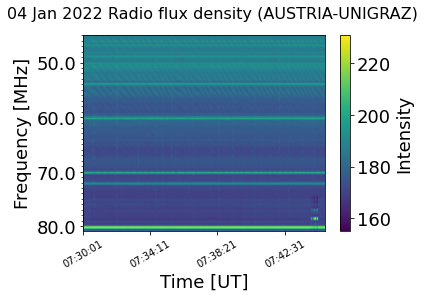

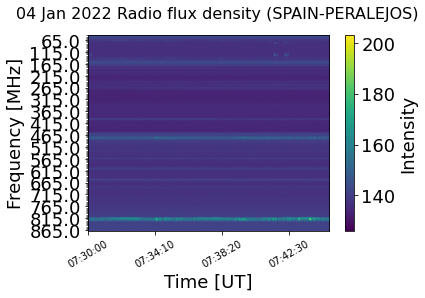

['III', 07:57:51, 07:58:15, '0.8992'] [ALMATY, INDONESIA]


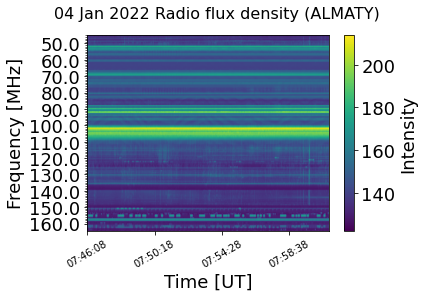

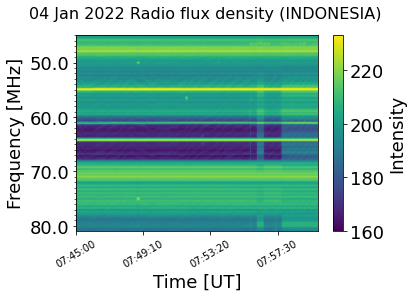

['III', 09:31:03, 09:31:24, '0.8352'] [ALMATY, INDIA-Nashik, INDIA-Nashik]


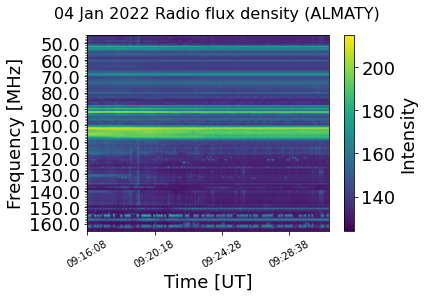

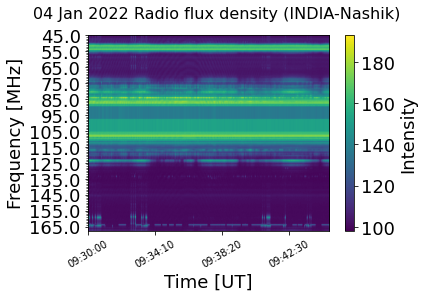

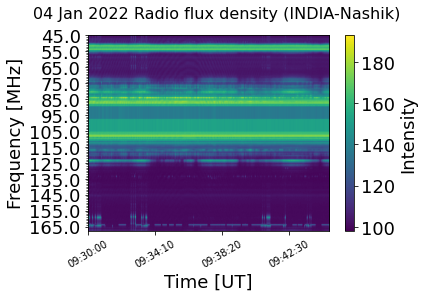

['III', 10:43:47, 10:44:06, '0.9041'] [GLASGOW, INDONESIA, GLASGOW]


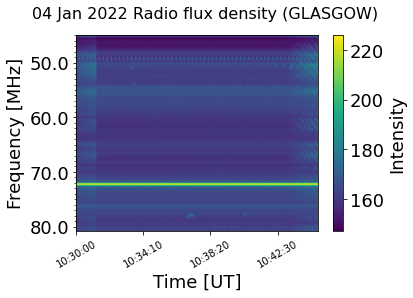

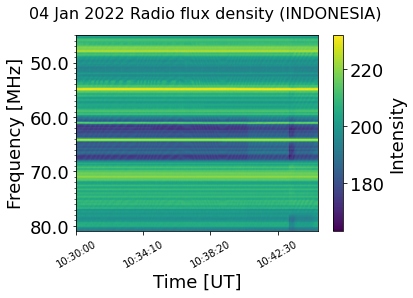

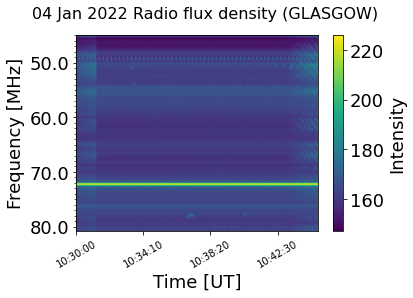

['III', 11:12:30, 11:12:45, '0.8294'] [GLASGOW, SWISS-MUHEN]


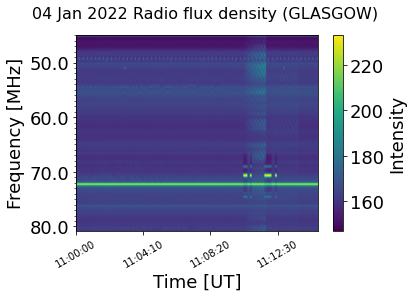

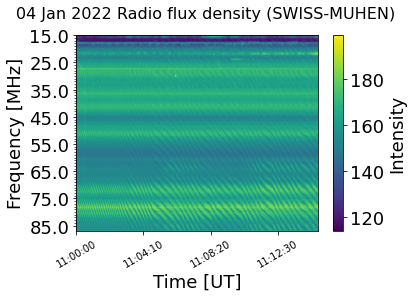

['III', 11:21:08, 11:21:14, '0.8019'] [INDIA-Nashik, Arecibo-Observatory]


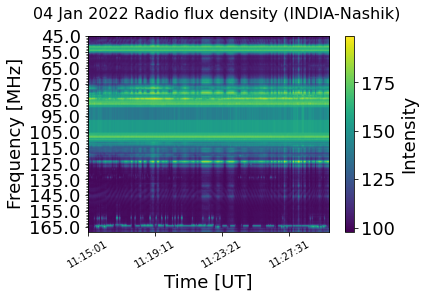

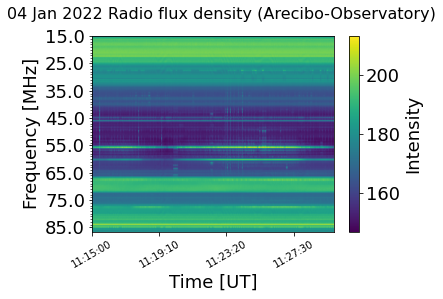

['III', 14:44:29, 14:44:37, '0.8379'] [AUSTRIA-UNIGRAZ, GLASGOW, AUSTRIA-UNIGRAZ]


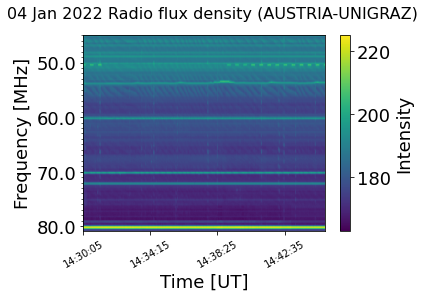

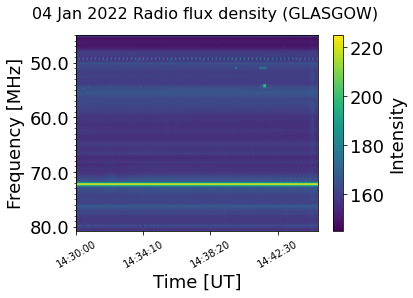

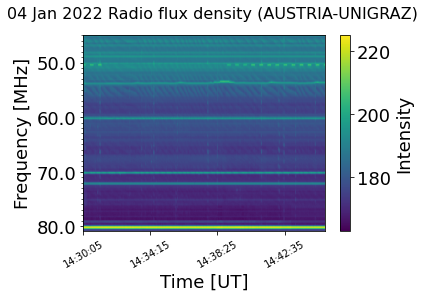

['III', 17:54:33, 17:54:54, '0.8672'] [EGYPT-Alexandria, GLASGOW]


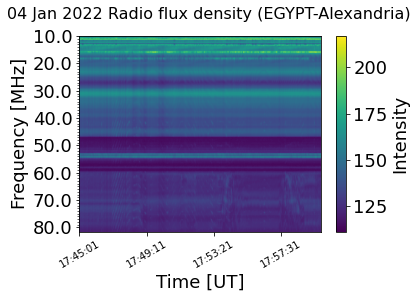

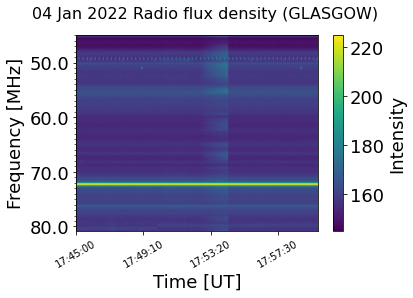

In [12]:
for i in a:
    print(i, i.stations)
    for j in i.stations:
        dp = data.createFromTime(i.time_start, station=j, extent=False)
        dp.plot()

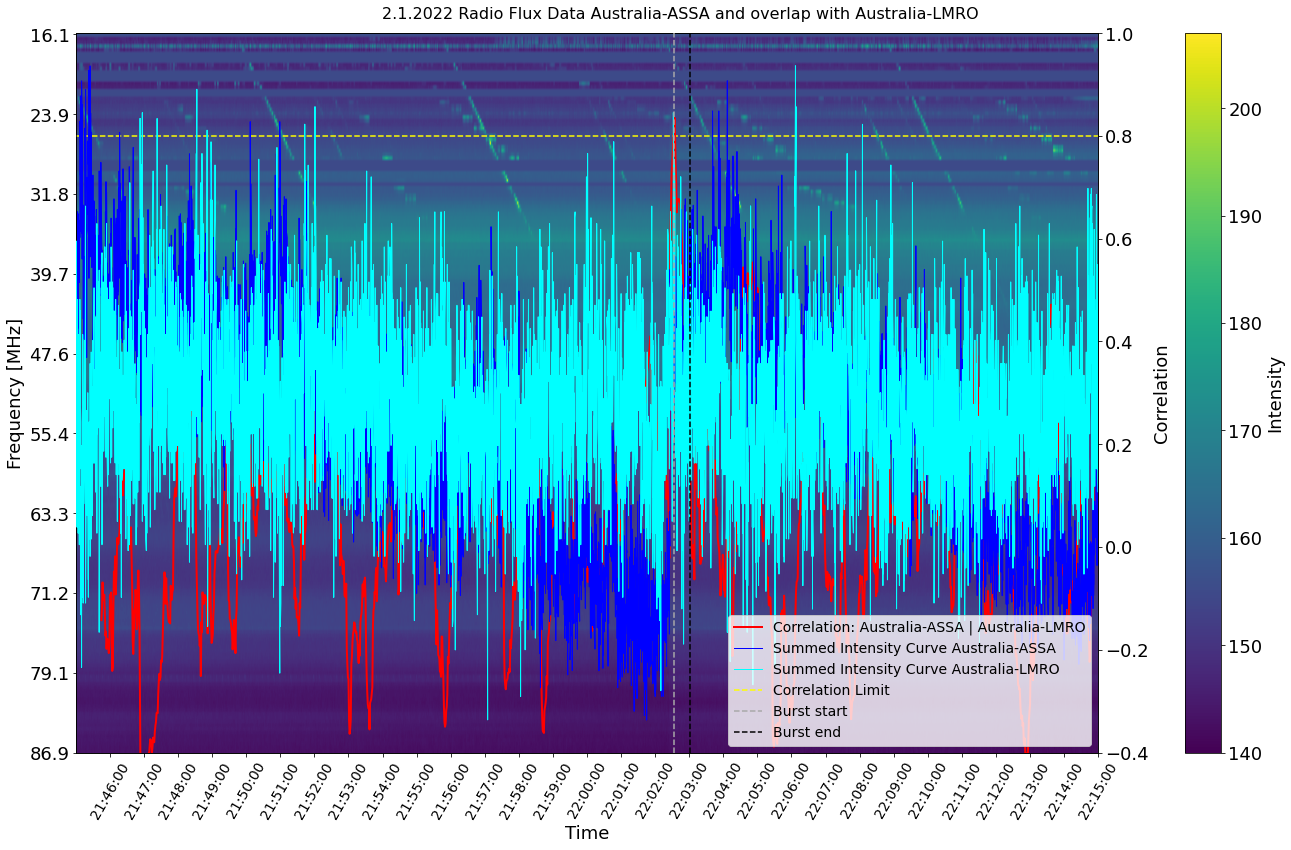

In [25]:
ev = a[-1]
dp1 = data.createFromTime(ev.time_start, station=ev.stations[0])
dp2 = data.createFromTime(ev.time_start, station=ev.stations[1])

d1, d2, c1 = analysis.calcPoint(ev.time_start, obs1=ev.stations[0], obs2=ev.stations[1], mask_frq=True)
analysis.plotEverything(d1, d2, c1)

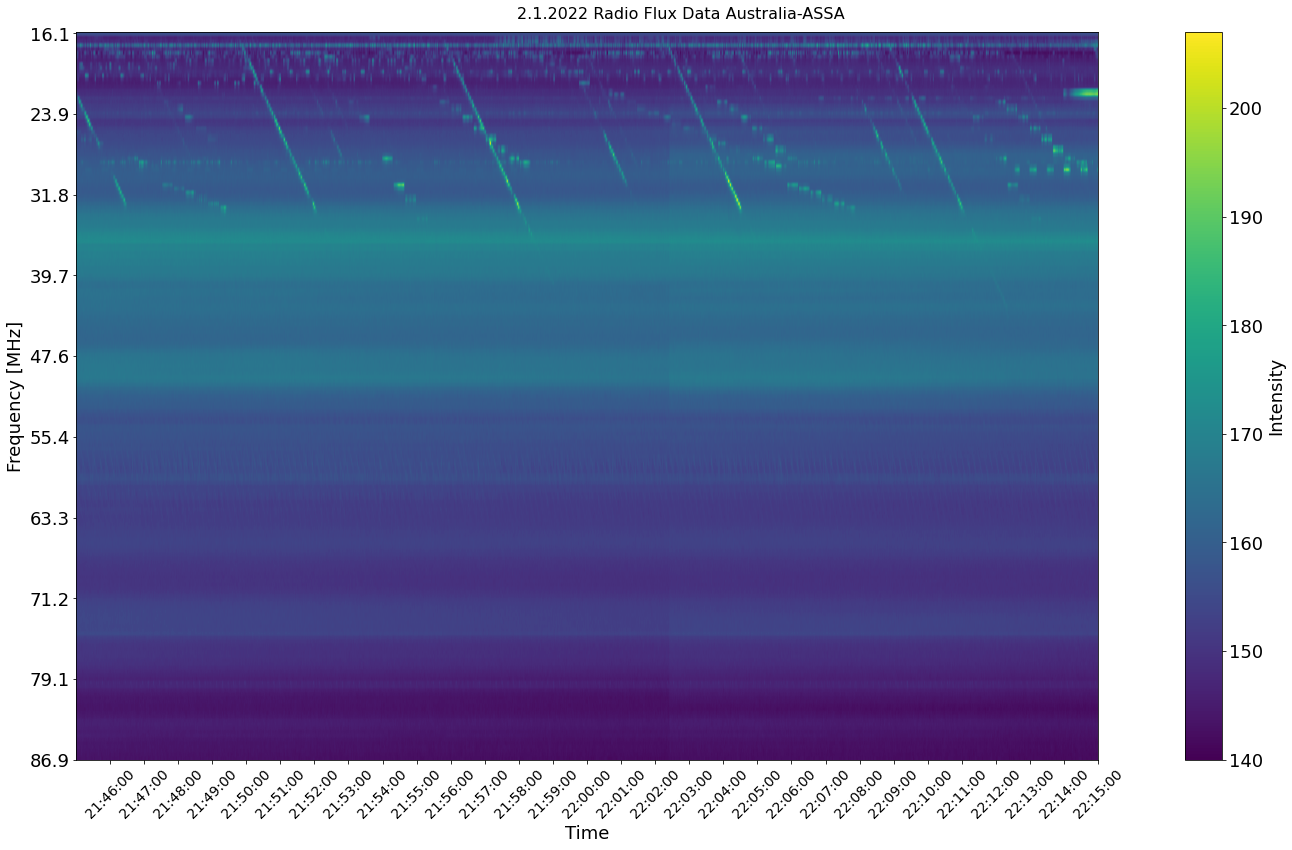

In [26]:
analysis.plotDatapoint(dp1)

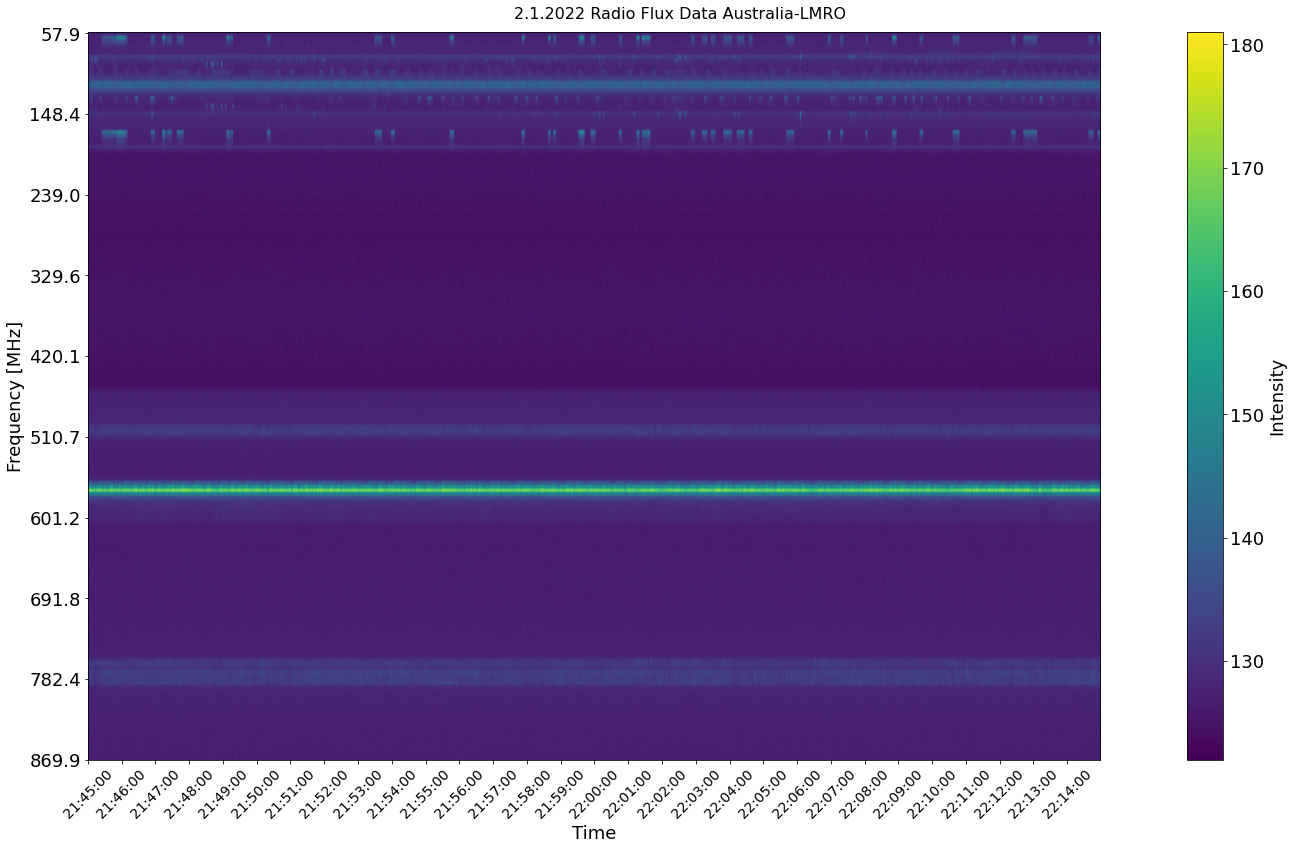

In [27]:
analysis.plotDatapoint(dp2)